对于回归分析的结果，往往还需要经历一个流程，那就是：假设检验


In [5]:
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [6]:


# 生成 2 组 x 相同的示例数据
x = np.array([4, 8, 12, 25, 32, 43, 58, 63, 69, 79]).reshape(-1, 1)
y1 = np.array([9, 17, 23, 51, 62, 83, 115, 125, 137, 159]).reshape(-1, 1)
y2 = np.array([20, 33, 50, 56, 42, 31, 33, 46, 65, 75]).reshape(-1, 1)

In [7]:
x.shape,y1.shape,y2.shape,

((10, 1), (10, 1), (10, 1))

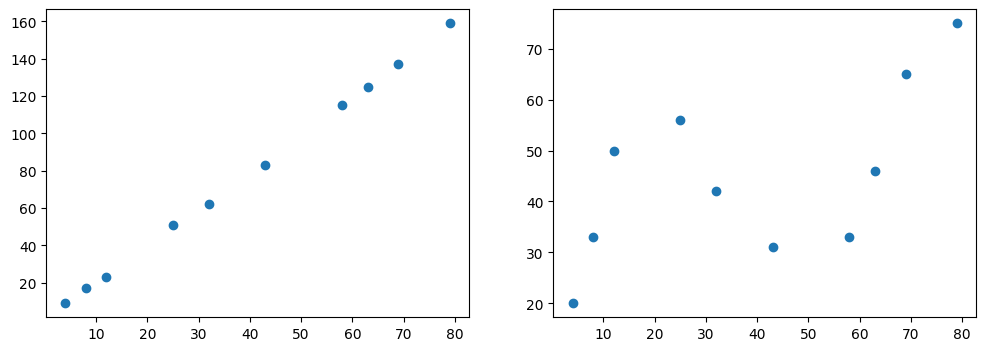

In [8]:


# 两组数据分别绘制子图
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].scatter(x, y1)
axes[1].scatter(x, y2)

In [9]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()  # 线性模型 1
model1.fit(x, y1)

model2 = LinearRegression()  # 线性模型 2
model2.fit(x, y2)

LinearRegression()

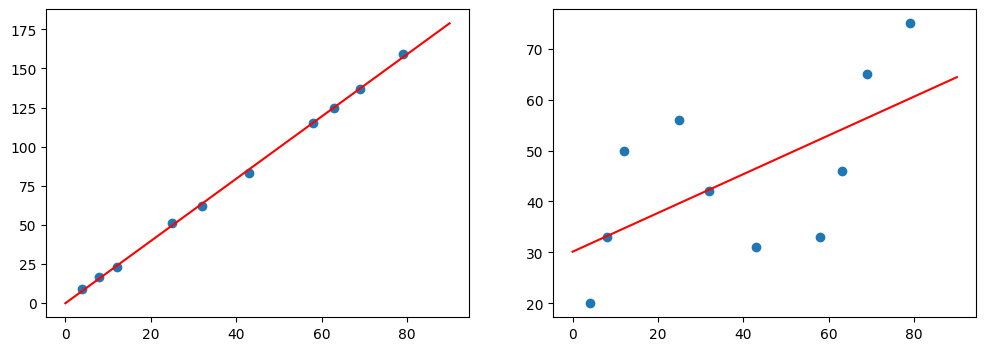

In [10]:
# 绘制拟合直线到原散点图中
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
# 模型 1
axes[0].scatter(x, y1)
axes[0].plot([0, 90], [model1.intercept_, model1.coef_[0] * 90 + model1.intercept_], "r")
# 模型 2
axes[1].scatter(x, y2)
axes[1].plot(
    [0, 90], [model2.intercept_, model2.coef_[0] * 90 + model2.intercept_], "r"
)

In [11]:
from sklearn.metrics import r2_score



In [12]:
r2_score(y1, model1.predict(x)), r2_score(y2, model2.predict(x))


(0.9993315719475073, 0.3740615194558857)

In [13]:
# 使用公式计算方法验证 model1 计算结果
rss = np.sum(pow((y1 - model1.predict(x)), 2))
tss = np.sum(pow((y1 - np.mean(y1)), 2))
1 - rss / tss

0.9993315719475073

In [15]:
import statsmodels.api as sm


In [18]:
x = sm.add_constant(x)  # 添加截距项系数 1
model = sm.OLS(endog=y1, exog=x)  # 普通最小二乘法, endog 因变量, exog 自变量
results = model.fit()
results.params  # 输出拟合后系数

array([-0.00964898,  1.98752287])

In [19]:
import warnings

warnings.filterwarnings("ignore")

results.summary2(alpha=0.05)  # 输出模型摘要, 95% 置信度

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.999    
Dependent Variable: y                AIC:                37.9581  
Date:               2024-07-19 10:45 BIC:                38.5633  
No. Observations:   10               Log-Likelihood:     -16.979  
Df Model:           1                F-statistic:        1.196e+04
Df Residuals:       8                Prob (F-statistic): 5.46e-14 
R-squared:          0.999            Scale:              2.1838   
--------------------------------------------------------------------
            Coef.    Std.Err.      t       P>|t|     [0.025   0.975]
--------------------------------------------------------------------
const      -0.0096     0.8535    -0.0113   0.9913   -1.9779   1.9586
x1          1.9875     0.0182   109.3635   0.0000    1.9456   2.0294
------------------------------------------------------------------
Omnibus:              0.359         Durbin-Watson:           1.546
Prob(Omnibus):        0.836         Jarque-Bera (JB):        0.456
Skew:                 -0.287        Prob(JB):                0.796
Kurtosis:             2.125         Condition No.:           86   
==================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
"""

 适合用于做多元回归建模时，就可以通过查看 P 值，把不显著的变量剔除。  不适合用于一元多项式

In [6]:


# 加载示例数据
x = [4, 8, 12, 25, 32, 43, 58, 63, 69, 79]
y = [20, 33, 50, 56, 42, 31, 33, 46, 65, 7]

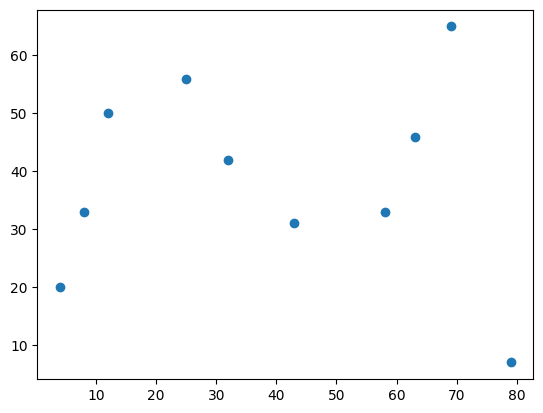

In [7]:
plt.scatter(x, y)

In [8]:
from sklearn.preprocessing import PolynomialFeatures



In [9]:
x = np.array(x).reshape(-1, 1)  
y = np.array(y).reshape(-1,1)
poly_features = PolynomialFeatures(degree=2, include_bias=True)
poly_x = poly_features.fit_transform(x.reshape(-1,1))


In [11]:
import statsmodels.api as sm


In [12]:
model = sm.OLS(endog=y, exog=poly_x)  # 普通最小二乘法, endog 因变量, exog 自变量
results = model.fit()
results.params  # 输出拟合后系数

array([ 2.43388350e+01,  1.24841082e+00, -1.59139413e-02])

In [13]:
import warnings

warnings.filterwarnings("ignore")

results.summary2(alpha=0.05)  # 输出模型摘要, 95% 置信度

<class 'statsmodels.iolib.summary2.Summary'>
"""
                Results: Ordinary least squares
================================================================
Model:              OLS              Adj. R-squared:     0.013  
Dependent Variable: y                AIC:                87.5655
Date:               2024-07-19 11:06 BIC:                88.4733
No. Observations:   10               Log-Likelihood:     -40.783
Df Model:           2                F-statistic:        1.061  
Df Residuals:       7                Prob (F-statistic): 0.396  
R-squared:          0.233            Scale:              291.59 
------------------------------------------------------------------
          Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
------------------------------------------------------------------
const    24.3388    14.3052    1.7014   0.1327   -9.4875   58.1652
x1        1.2484     0.9039    1.3812   0.2097   -0.8889    3.3858
x2       -0.0159     0.0110   -1.4511   0.1900   -0.0418    0.0100
----------------------------------------------------------------
Omnibus:               1.486       Durbin-Watson:          1.847
Prob(Omnibus):         0.476       Jarque-Bera (JB):       0.799
Skew:                  0.660       Prob(JB):               0.671
Kurtosis:              2.579       Condition No.:          8116 
================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
[2] The condition number is large, 8.12e+03. This might indicate
that there are strong multicollinearity or other numerical
problems.
"""